# Normalization and Standardization

## Types of Transformation
1. Normalization and standardization
2. Scaling to minimum and maximum values
3. Scaling to median and Quantiles
4. Gaussian transformation, Logarithmic transformation, Exponential transformation, Reciprocal transformation, Square root transformation, Box cox transformation

### Standardization
z = (x-x_mean)/std

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [7]:
## standardization: we use the standardscalar from sklearn library
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
df_transformed = scaler.fit_transform(df)

In [10]:
pd.DataFrame(df_transformed)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [11]:
def standardize(df, attribute, mean, std):
    df[attribute] = (df[attribute]-mean)/std

In [13]:
for attribute in df.columns:
    standardize(df, attribute, df[attribute].mean(), df[attribute].std())

In [14]:
df.head(10)

,Survived,Pclass,Age,Fare
0,-0.788829,0.826913,-0.565419,-0.502163
1,1.266279,-1.565228,0.663488,0.786404
2,1.266279,0.826913,-0.258192,-0.488580
3,1.266279,-1.565228,0.433068,0.420494
4,-0.788829,0.826913,0.433068,-0.486064
5,-0.788829,0.826913,-0.104579,-0.477848
6,-0.788829,-1.565228,1.892396,0.395591
7,-0.788829,0.826913,-2.101553,-0.223957
8,1.266279,0.826913,-0.181385,-0.424018
9,1.266279,-0.369158,-1.179873,-0.042931


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56522783, -1.4456208 , -1.32601377, -1.20640673, -1.0867997 ,
        -0.96719267, -0.84758564, -0.7279786 , -0.60837157, -0.48876454,
        -0.36915751, -0.24955047, -0.12994344, -0.01033641,  0.10927062,
         0.22887765,  0.34848469,  0.46809172,  0.58769875,  0.70730578,
         0.82691282]),
 <BarContainer object of 20 artists>)

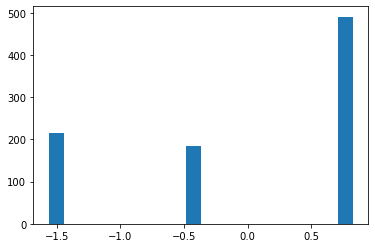

In [17]:
plt.hist(df['Pclass'], bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

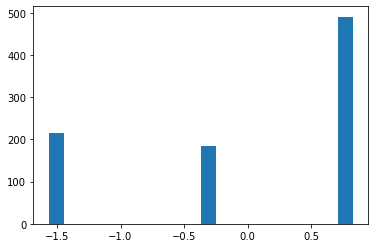

In [18]:
plt.hist(df_transformed[:,1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

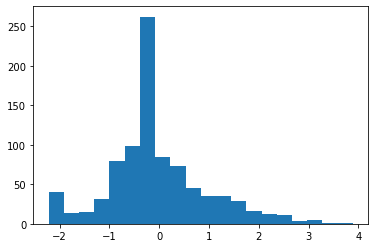

In [19]:
plt.hist(df_transformed[:,2], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

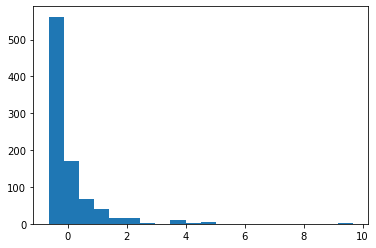

In [20]:
plt.hist(df_transformed[:,3], bins=20)

###  Min Max Scalar
used in CNN deep learning
z = (x-x_min)/(x_max-x_min)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

In [23]:
df_minmax.head(10)

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
5,0.0,1.0,0.346569,0.016510
6,0.0,0.0,0.673285,0.101229
7,0.0,1.0,0.019854,0.041136
8,1.0,1.0,0.334004,0.021731
9,1.0,0.5,0.170646,0.058694


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

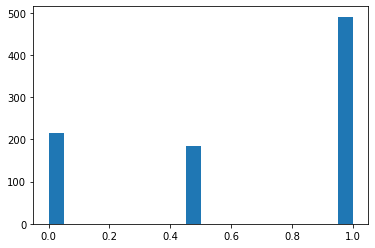

In [24]:
plt.hist(df_minmax['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

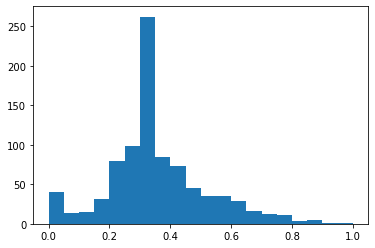

In [25]:
plt.hist(df_minmax['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

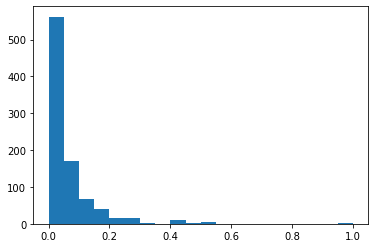

In [26]:
plt.hist(df_minmax['Fare'], bins=20)

### Robust Scaler
X_scaled = (x-x_median)/IQR
IQR = 75th quantile - 25th quantile

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
robust = RobustScaler()
df_robust = pd.DataFrame(robust.fit_transform(df), columns=df.columns)

In [29]:
df_robust.head(10)

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
5,0.0,0.0,0.000000,-0.259680
6,0.0,-2.0,2.000000,1.620136
7,0.0,0.0,-2.000000,0.286744
8,1.0,0.0,-0.076923,-0.143827
9,1.0,-1.0,-1.076923,0.676348


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

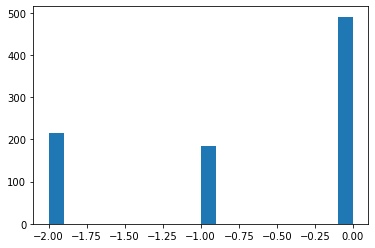

In [30]:
plt.hist(df_robust['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

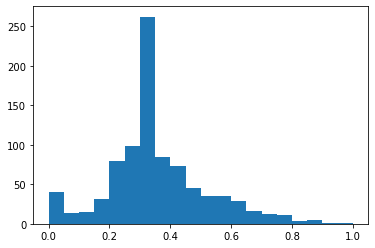

In [31]:
plt.hist(df_minmax['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

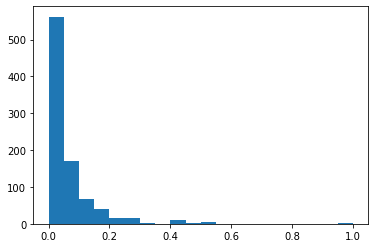

In [32]:
plt.hist(df_minmax['Fare'], bins=20)